# 在Class中实现

实现了train acc 和TDA的比较

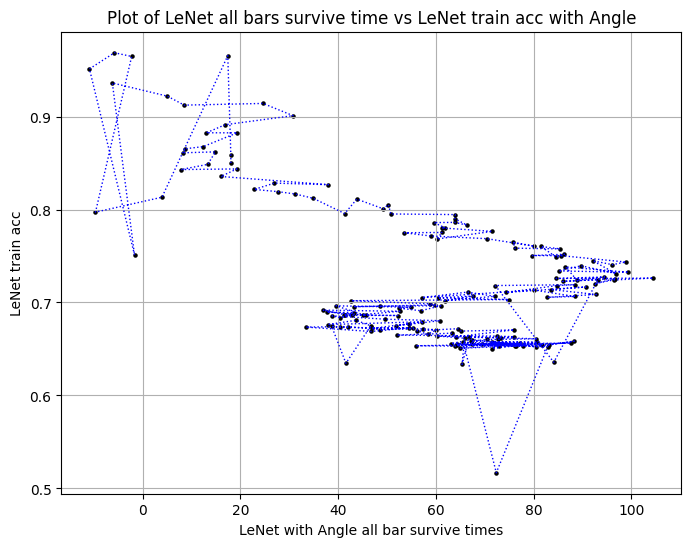

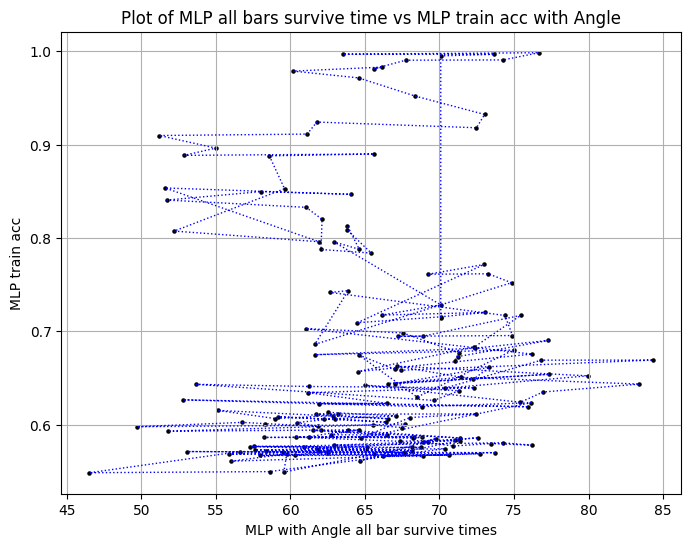

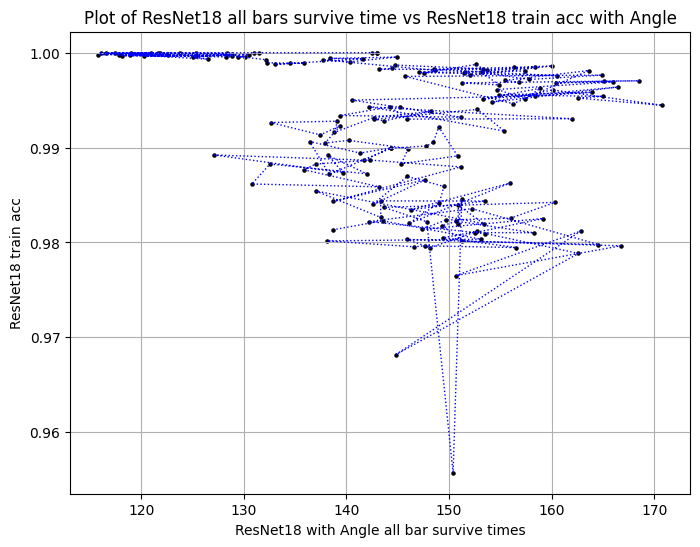

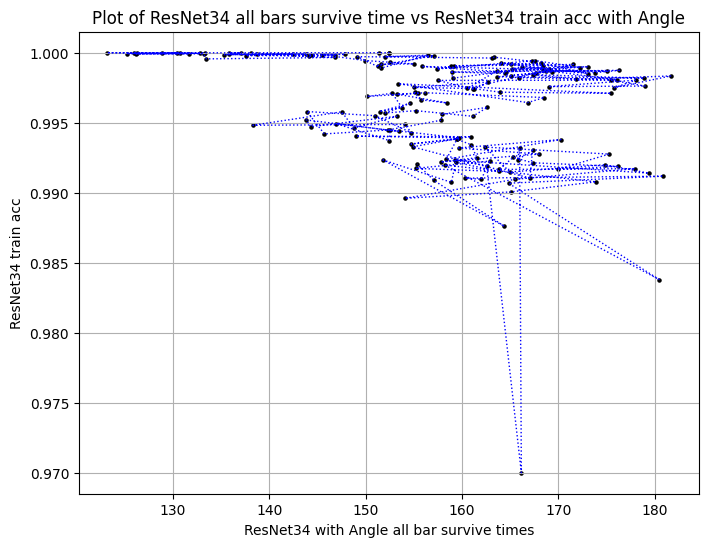

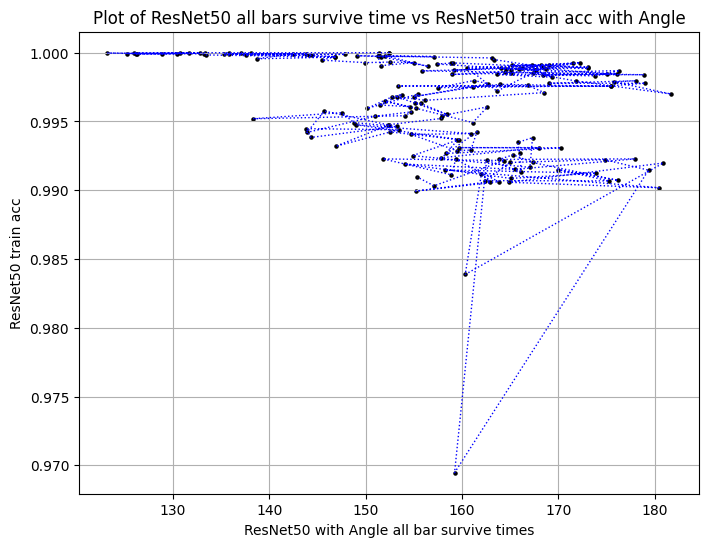

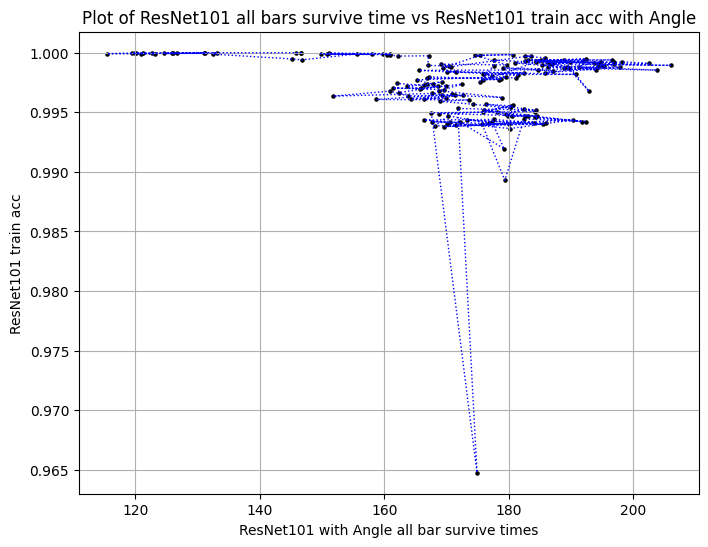

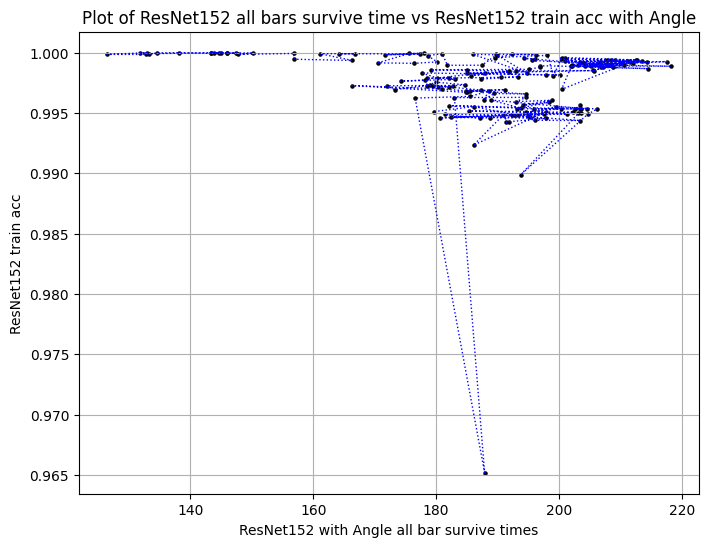

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

class Plotter:
    def __init__(self, tda_path, acc_path, sheet_name, save_path):
        self.tda_path = tda_path
        self.acc_path = acc_path
        self.tda_sheet_name = sheet_name
        self.acc_sheet_name = sheet_name
        self.save_path = save_path
        # 确保保存路径存在，如果不存在则创建
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path)
    def load_dataframes(self):
        # 读取 Excel 文件为 DataFrame
        self.df_TDA = pd.read_excel(self.tda_path, sheet_name=self.tda_sheet_name)
        self.df_acc = pd.read_excel(self.acc_path, sheet_name=self.acc_sheet_name).iloc[:, 1:]

    def generate_plots(self):
        # 假设 df 是你从 Excel 文件中读取的 DataFrame
        # print("执行减法之前：\n")
        # print(self.df_TDA)
        # 选择第一列作为被减数
        subtrahend = self.df_TDA.iloc[:, 1]

        # 选择其他列作为减数
        minuend = self.df_TDA.iloc[:, 1:]  # 这里假设你想要减去除了第一列以外的所有列

        # 执行减法操作
        result_df = minuend.sub(subtrahend, axis=0)  # 在行的方向上执行减法

        # 添加新的列到结果 DataFrame
        result_df.columns = [f"{col}" for col in minuend.columns]

        # 删除第一列
        # print("执行减法之后：\n")
        # print(result_df)
        tda_result_df = result_df.drop(result_df.columns[0], axis=1)
        self.tda_result_df = tda_result_df

        # 确保两个 DataFrame 的列数相同
        if len(self.tda_result_df.columns) != len(self.df_acc.columns):
            raise ValueError("两个 DataFrame 的列数不相同")

        # 获取列名列表
        tda_columns = self.tda_result_df.columns
        acc_columns = self.df_acc.columns

        # 遍历每一列并绘制图像
        for tda_col, acc_col in zip(tda_columns, acc_columns):
            # 获取数据并绘图
            tda_data = self.tda_result_df[tda_col]
            acc_data = self.df_acc[acc_col]

            # 绘制图像
            plt.figure(figsize=(8, 6))  # 设置图像大小
            plt.scatter(tda_data, acc_data, marker='o', s=5, color='black')  # 绘制其余点
            plt.plot(tda_data, acc_data, linestyle=':', linewidth=1, color='blue')  # 绘制图像

            plt.xlabel(f"{tda_col} with {self.acc_sheet_name} all bar survive times")  # 设置横坐标标签
            plt.ylabel(f"{acc_col} train acc")  # 设置纵坐标标签
            plt.title(f"Plot of {tda_col} all bars survive time vs {acc_col} train acc with {self.acc_sheet_name}")  # 设置图像标题
            plt.grid(True)  # 添加网格线
            plt.savefig(f"{self.save_path}/{tda_col}_{acc_col}_{self.acc_sheet_name}_plot.png")  # 保存图片
            plt.show()
            plt.close()  # 关闭图像

# 使用示例
tda_excel_path = '.\\Result\\NetTDA_2_0th\\model_TDA.xlsx'
acc_excel_path = '.\\Result\\WuyangResnet\\ResNetAcc20231223\\best_train_acc.xlsx'

plotter = Plotter(tda_excel_path, acc_excel_path, 'Angle', './Result/compare_TDA_ACC/saved_plots')
plotter.load_dataframes()
plotter.generate_plots()
# print(plotter.tda_result_df.head())

# 比较val acc 和TDA

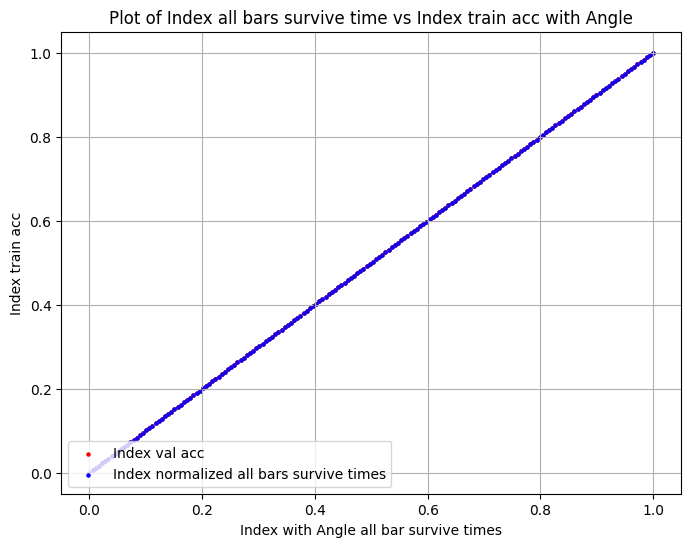

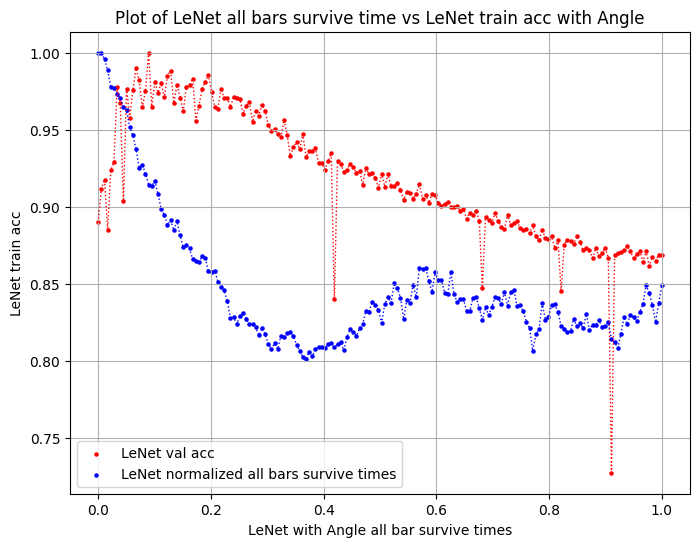

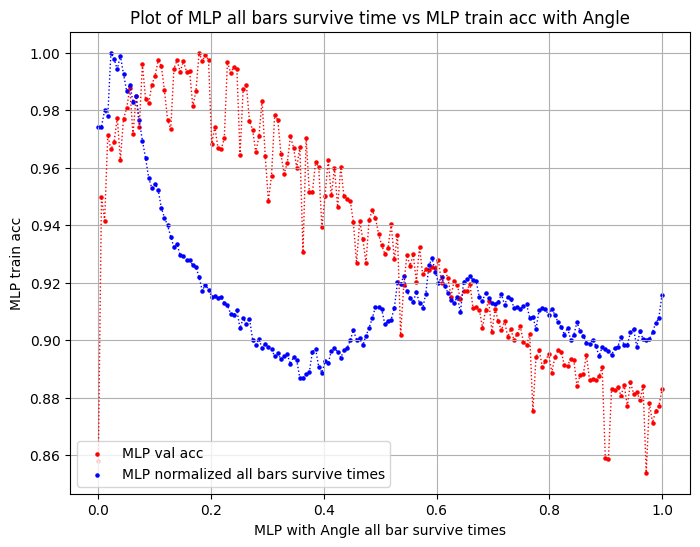

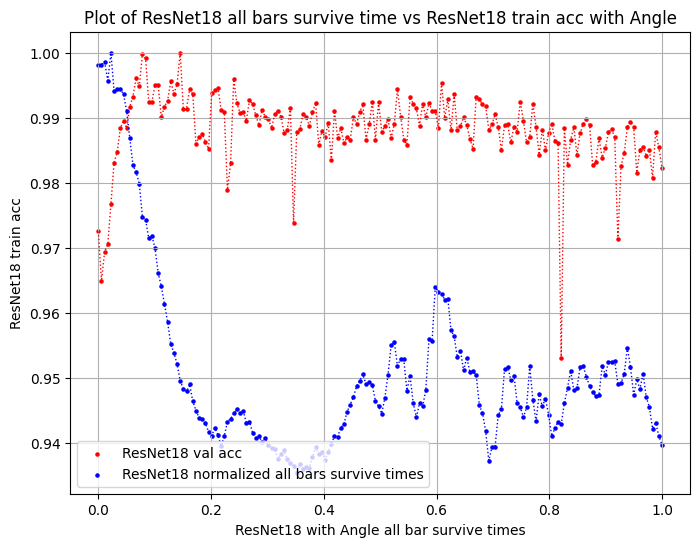

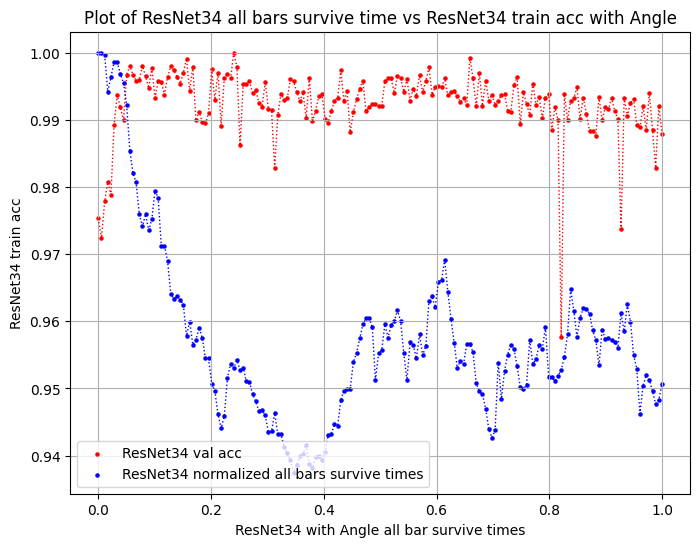

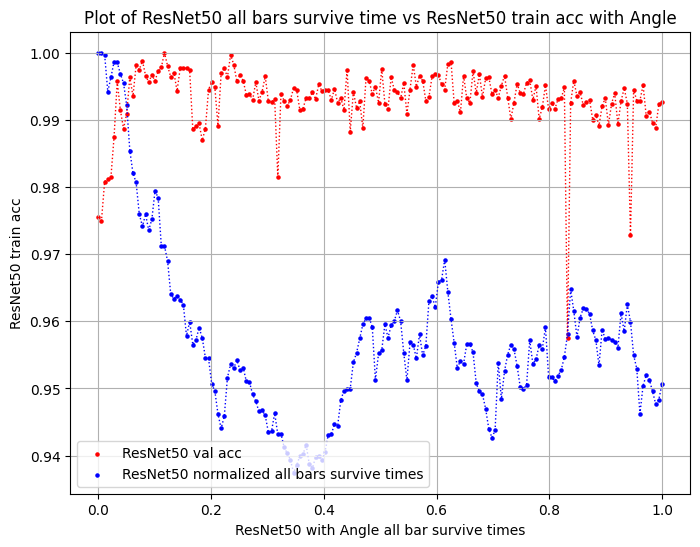

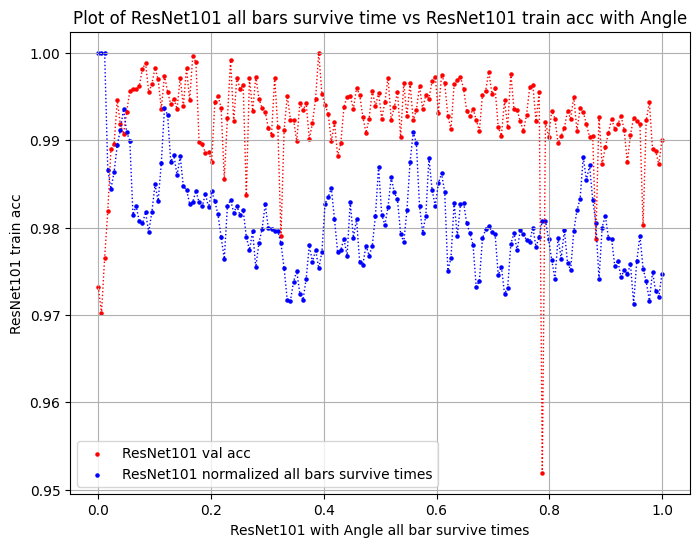

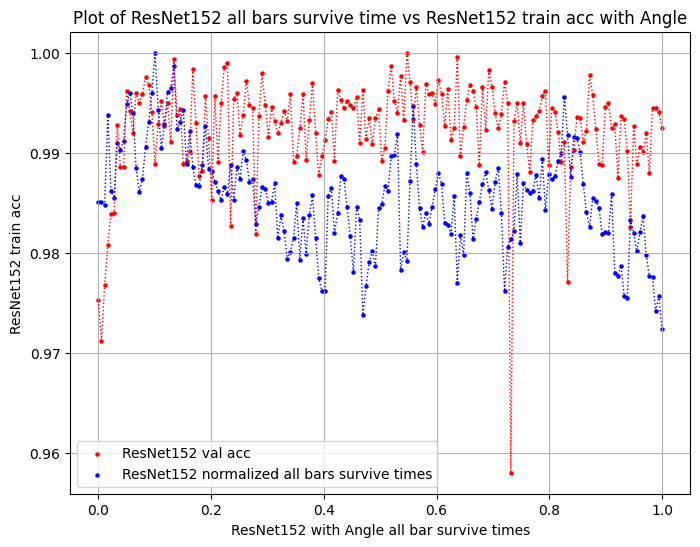

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler

class Plotter:
    def __init__(self, tda_path, acc_path, sheet_name, save_path):
        self.tda_path = tda_path
        self.acc_path = acc_path
        self.tda_sheet_name = sheet_name
        self.acc_sheet_name = sheet_name
        self.save_path = save_path
        # 确保保存路径存在，如果不存在则创建
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path)
    def load_dataframes(self):
        # 读取 Excel 文件为 DataFrame
        self.df_TDA = pd.read_excel(self.tda_path, sheet_name=self.tda_sheet_name)
        self.df_acc = pd.read_excel(self.acc_path, sheet_name=self.acc_sheet_name)

    def generate_plots(self):
        self.tda_result_df = self.df_TDA

        # 确保两个 DataFrame 的列数相同
        if len(self.tda_result_df.columns) != len(self.df_acc.columns):
            print(len(self.tda_result_df.columns))
            print(len(self.df_acc.columns))
            raise ValueError("两个 DataFrame 的列数不相同")

        # 获取列名列表
        tda_columns = self.tda_result_df.columns
        acc_columns = self.df_acc.columns

        # 遍历每一列并绘制图像
        for tda_col, acc_col in zip(tda_columns, acc_columns):
            # 获取数据并绘图
            tda_data = self.tda_result_df[tda_col]
            acc_data = self.df_acc[acc_col]

            # # Normalize the data using MinMaxScaler
            # scaler = MinMaxScaler()
            # normalized_tda_data = scaler.fit_transform(np.array(tda_data).reshape(-1, 1))
            # normalized_acc_data = scaler.fit_transform(np.array(acc_data).reshape(-1, 1))

            # 计算最大值
            max_value_tda = max(tda_data)
            max_value_acc = max(acc_data)

            # 对数据进行归一化
            normalized_tda_data = tda_data / max_value_tda
            normalized_acc_data = acc_data / max_value_acc

            # Plot the normalized data
            plt.figure(figsize=(8, 6))
            plt.scatter(np.arange(len(normalized_tda_data)) / (len(normalized_tda_data) - 1), normalized_acc_data, marker='o', s=5, color='red', label=f'{acc_col} val acc')
            plt.plot(np.arange(len(normalized_tda_data)) / (len(normalized_tda_data) - 1), normalized_acc_data, linestyle=':', linewidth=1, color='red')

            plt.scatter(np.arange(len(normalized_tda_data)) / (len(normalized_tda_data) - 1), normalized_tda_data, marker='o', s=5, color='blue', label=f'{tda_col} normalized all bars survive times')
            plt.plot(np.arange(len(normalized_tda_data)) / (len(normalized_tda_data) - 1), normalized_tda_data, linestyle=':', linewidth=1, color='blue')

            plt.xlabel(f"{tda_col} with {self.acc_sheet_name} all bar survive times")
            plt.ylabel(f"{acc_col} train acc")
            plt.title(f"Plot of {tda_col} all bars survive time vs {acc_col} train acc with {self.acc_sheet_name}")
            plt.grid(True)
            plt.legend(loc='lower left')  # Setting legend position to bottom left
            plt.savefig(f"{self.save_path}/{tda_col}_{acc_col}_{self.acc_sheet_name}_plot.png")
            plt.show()
            plt.close()

# 使用示例
tda_excel_path = '.\\Result\\NetTDA_2_0th\\model_TDA.xlsx'
acc_excel_path = '.\\Result\\WuyangResnet\\ResNetAcc20231223\\best_val_acc.xlsx'

plotter = Plotter(tda_excel_path, acc_excel_path, 'Angle', './Result/compare_TDA_ACC/angle')
plotter.load_dataframes()
plotter.generate_plots()
# print(plotter.tda_result_df.head())

# 比较模型参数

In [30]:
import os
import pickle

def read_pkl_files(folder_path, target_filenames):
    TDA_all_survive_times = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".pkl") and file in target_filenames:
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'rb') as f:
                        data = pickle.load(f)
                        print(f"File: {file_path}")
                        print("Content:")
                        print(data["all_bars_survive_time_sum"])
                        # print(data)
                        print("\n")
                        TDA_all_survive_times.append(data["all_bars_survive_time_sum"][0])
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    return TDA_all_survive_times
# 例如，指定要关注的pkl文件名列表
target_files = ["L2_betti_features_0th.pkl"]  # 以实际文件名为准

# 调用函数并传入文件夹路径和指定的文件名列表
folder_path = ".\Result\model_DTA"  # 指定文件夹路径
TDA_all_survive_times = read_pkl_files(folder_path, target_files)
print(TDA_all_survive_times)

File: .\Result\model_DTA\0\L2_betti_features_0th.pkl
Content:
(762.6395780879765, 0.0)


File: .\Result\model_DTA\1\L2_betti_features_0th.pkl
Content:
(746.9453096895213, 0.0)


File: .\Result\model_DTA\2\L2_betti_features_0th.pkl
Content:
(842.5712260831874, 0.0)


File: .\Result\model_DTA\3\L2_betti_features_0th.pkl
Content:
(821.9150889189893, 0.0)


File: .\Result\model_DTA\4\L2_betti_features_0th.pkl
Content:
(770.3562305794071, 0.0)


File: .\Result\model_DTA\5\L2_betti_features_0th.pkl
Content:
(729.9877708773813, 0.0)


File: .\Result\model_DTA\6\L2_betti_features_0th.pkl
Content:
(787.0803105742348, 0.0)


[762.6395780879765, 746.9453096895213, 842.5712260831874, 821.9150889189893, 770.3562305794071, 729.9877708773813, 787.0803105742348]


In [38]:
TDA_all_survive_times = [762.6395780879765, 746.9453096895213, 842.5712260831874, 821.9150889189893, 770.3562305794071, 729.9877708773813, 787.0803105742348]
TDA_all_survive_times = np.array(TDA_all_survive_times)
data_all_survive_time = 692.552283936215

In [4]:
def count_parameters(models):
    parameters_count = []

    for model in models:
        # print(type(model).__name__)
        parameters_count.append(sum(p.numel() for p in model.parameters()))

    return parameters_count

from nets.resnet import ResNet18, ResNet34, ResNet50, ResNet101, ResNet152
from nets.simple_net import MLP, LeNet

model_list = [MLP(), LeNet(), ResNet18(), ResNet34(), ResNet50(), ResNet101(), ResNet152()]

para_list = count_parameters(model_list)
print(para_list)

[1707274, 136886, 11173962, 21282122, 23520842, 42512970, 58156618]


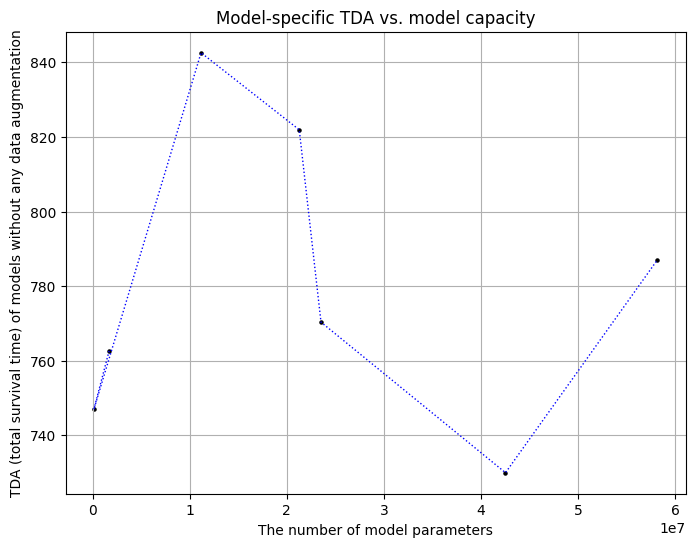

In [40]:
# 绘制图像
plt.figure(figsize=(8, 6))  # 设置图像大小
plt.scatter(para_list, TDA_all_survive_times, marker='o', s=5, color='black')  # 绘制其余点
plt.plot(para_list, TDA_all_survive_times, linestyle=':', linewidth=1, color='blue')  # 绘制图像

plt.xlabel(f"The number of model parameters")  # 设置横坐标标签
plt.ylabel(f"TDA (total survival time) of models without any data augmentation")  # 设置纵坐标标签
plt.title(f"Model-specific TDA vs. model capacity")  # 设置图像标题
plt.grid(True)  # 添加网格线
# plt.savefig(f"{self.save_path}/{tda_col}_{acc_col}_{self.acc_sheet_name}_plot.png")  # 保存图片
plt.show()
plt.close()  # 关闭图像

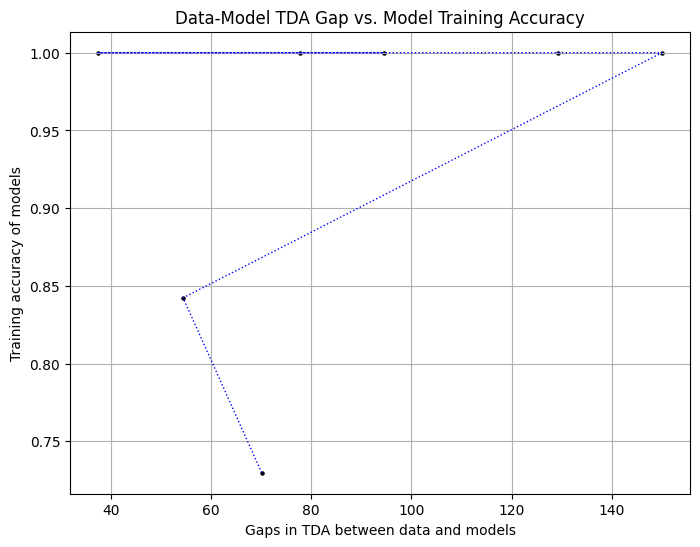

In [42]:
# 绘制图像
train_acc_list = [0.72984, 0.84236, 1.0, 1.0, 1.0, 1.0, 1.0]
plt.figure(figsize=(8, 6))  # 设置图像大小
plt.scatter(TDA_all_survive_times - data_all_survive_time, train_acc_list,marker='o', s=5, color='black')  # 绘制其余点
plt.plot(TDA_all_survive_times - data_all_survive_time, train_acc_list,linestyle=':', linewidth=1, color='blue')  # 绘制图像

plt.xlabel(f"Gaps in TDA between data and models")  # 设置横坐标标签
plt.ylabel(f"Training accuracy of models")  # 设置纵坐标标签
plt.title(f"Data-Model TDA Gap vs. Model Training Accuracy")  # 设置图像标题
plt.grid(True)  # 添加网格线
# plt.savefig(f"{self.save_path}/{tda_col}_{acc_col}_{self.acc_sheet_name}_plot.png")  # 保存图片
plt.show()
plt.close()  # 关闭图像